In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("train.csv")
print(df.head())
print(df.info())
print(df.describe())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [9]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [3]:
# Drop rows/columns with too many missing values
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# Fill missing values
df = df.fillna(df.mean(numeric_only=True))

# Select numeric features
numeric_features = df.select_dtypes(include=[np.number])
X = numeric_features.drop('SalePrice', axis=1)
y = numeric_features['SalePrice']

# Fill any remaining NaNs
X = X.fillna(X.mean())


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
892,893,20,70.0,8414,6,8,1963,2003,0.0,663,...,264,192,0,0,0,0,0,0,2,2006
1105,1106,60,98.0,12256,8,5,1994,1995,362.0,1032,...,712,186,32,0,0,0,0,0,4,2010
413,414,30,56.0,8960,5,6,1927,1950,0.0,0,...,360,0,0,130,0,0,0,0,3,2010
522,523,50,50.0,5000,6,7,1947,1950,0.0,399,...,420,0,24,36,0,0,0,0,10,2006
1036,1037,20,89.0,12898,9,5,2007,2008,70.0,1022,...,912,228,0,0,0,0,0,0,9,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,30,50.0,5925,4,7,1937,2000,435.0,168,...,672,0,72,0,0,0,0,0,3,2007
1361,1362,20,124.0,16158,7,5,2005,2005,16.0,1274,...,430,168,36,0,0,0,0,0,6,2009
802,803,60,63.0,8199,7,5,2005,2005,0.0,648,...,410,36,18,0,0,0,0,0,10,2008
651,652,70,60.0,9084,4,5,1940,1950,0.0,0,...,296,120,0,0,0,0,0,0,10,2009


[153855.20327798 309218.25107303 113027.97257374 180551.95142884
 294902.74750459  50747.49625392 233734.27097954 148016.12812806
  48351.28659423 149903.40359872 153212.18060843 113800.69643066
  75099.66581575 212608.98913574 187643.76402805 141297.12052875
 213158.19487268 137133.62451089 114941.70629856 235260.3367401
 182325.27528812 210952.27172796 190393.23795374 129995.27524178
 211528.22050197 151205.50585562 198293.22362509  77804.0485229
 178915.34028505 182657.32093774 118202.28695556 271861.16012083
 225294.26063463  88884.36591759 265999.24439642 159902.22798769
 148455.51947243 217704.41660933 304022.62368379  88118.0459557
 136816.32657866 249616.62025572 105401.31790651 275234.14039922
 128479.70142683 126500.72776727 103185.57516818 131596.33629808
 360488.73091769 128162.46711467 107080.70376977 214762.53742122
  89186.91507881 329534.04772586 162404.00024867 248761.76539101
 228832.76628488 148411.57986453 150720.04517349 112000.57503854
  56159.56956634 138337.7316

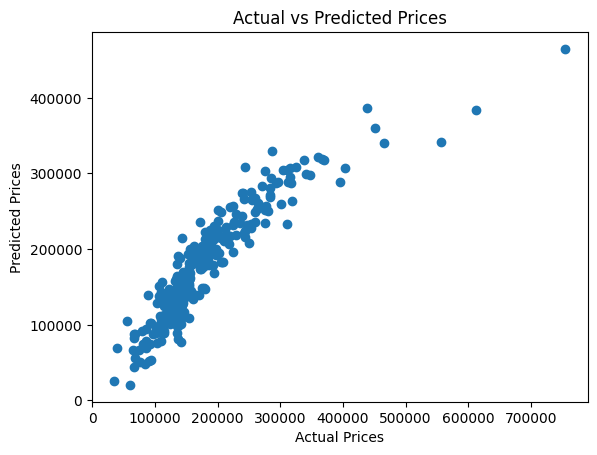

In [ ]:
y_pred = model.predict(X_test)


# Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [7]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df.sort_values(by='Coefficient', ascending=False))


                Coefficient
OverallQual    17929.604520
GarageCars     12348.241777
BsmtFullBath   11292.075435
TotRmsAbvGrd    5126.851415
Fireplaces      4767.541197
OverallCond     4188.916349
FullBath        2904.848613
YearBuilt        270.063178
YearRemodAdd     168.750009
GarageYrBlt      131.757737
ScreenPorch       63.582679
3SsnPorch         39.459683
GrLivArea         31.704866
MasVnrArea        24.534035
WoodDeckSF        21.542800
2ndFlrSF          14.364823
1stFlrSF          13.376101
EnclosedPorch      9.280939
BsmtFinSF1         9.124167
TotalBsmtSF        5.699740
LowQualFinSF       3.963943
LotArea            0.453652
BsmtUnfSF         -0.542756
MiscVal           -0.655493
Id                -2.225004
BsmtFinSF2        -2.881672
GarageArea        -3.963644
OpenPorchSF       -5.578807
PoolArea         -18.583128
LotFrontage     -132.945359
MoSold          -151.978991
MSSubClass      -202.093567
YrSold          -527.865995
BsmtHalfBath   -1162.713294
HalfBath       -2320